In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

In [3]:
data_root = '../data/Emory-4DCT'
test_index = 0
mask_roi = 'lung_combined_mask'
mesh_radius = 20
batch_size = 4
learning_rate = 1e-5
num_epochs = 1

In [4]:
emory4dct = project.imaging.Emory4DCT(data_root)
emory4dct

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [5]:
train_examples = emory4dct.get_examples(mask_roi, mesh_radius)
test_example = train_examples.pop(test_index)
test_example

(PosixPath('../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/CorrField/case1_T10_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_combined_mask.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T00_20.xdmf'),
 20)

In [6]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset([test_example])

In [7]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=3,
    num_conv_layers=2,
    conv_channels=4,
    conv_kernel_size=3
).cuda()

In [8]:
train_data

<IPython.core.display.Javascript object>


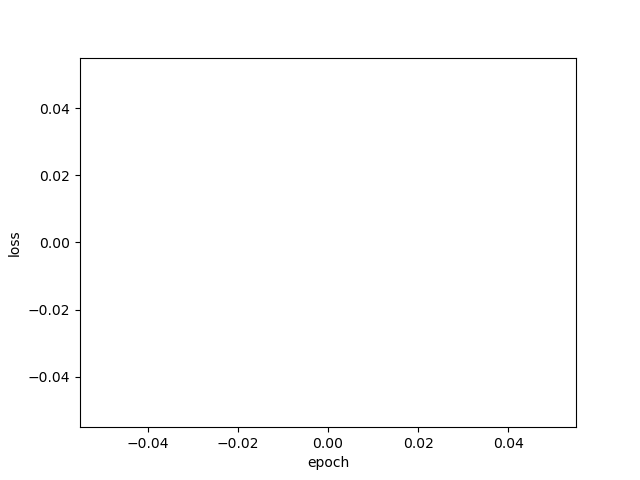

In [20]:
%autoreload
trainer = project.training.Trainer(
    model, train_data, test_data, batch_size, learning_rate
)

In [21]:
trainer.train(1)

Training...
Epoch 1/1
train phase
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T90.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T00_T90.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T90/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T90_20.xdmf... 404
Loading ../data/Emory-4DCT/Case3Pack/NIFTI/case3_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T20_T10.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/pygalmesh/case3_T10_20.xdmf... 529
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T90.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T00_T90.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T90/lung_combined_mask.nii.gz... (256, 256, 94)
Loading .

Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T20_20.xdmf... 654
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T80_T70.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T70/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T70_20.xdmf... 197
Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T30/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T30_20.xdmf... 647
Loading ../data/Emory-4DCT/Case9Pack/NIFTI/case9_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/CorrField/case9

Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T80.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T90_T80.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T80/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T80_20.xdmf... 659
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T30/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T30_20.xdmf... 632
Loading ../data/Emory-4DCT/Case3Pack/NIFTI/case3_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T80_T70.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T70/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pac

Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T80_T70.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T70/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/pygalmesh/case4_T70_20.xdmf... 344
Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T40.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T50_T40.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T40/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T40_20.xdmf... 641
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pac

In [22]:
trainer.metrics

loss  mu_pred_norm  u_pred_norm  \
phase epoch batch example                                               
train 1     1     case6_T90.nii   0.109608  2.278600e+08     0.629127   
                  case3_T10.nii   0.110232  2.927074e+08     1.417750   
                  case2_T90.nii   0.594786  3.741143e+08     0.083419   
                  case10_T20.nii  0.157268  2.412520e+08     1.230612   
            2     case3_T80.nii   0.064050  2.833858e+08     0.783037   
...                                    ...           ...          ...   
            24    case4_T20.nii   0.391925  2.061210e+08     0.833058   
            25    case2_T80.nii   1.857871  3.642452e+08     0.416365   
                  case1_T60.nii   0.242698  1.720265e+08     0.265251   
                  case8_T20.nii   0.145074  3.658634e+08     3.538492   
test  1     1     case1_T00.nii   2.065952  1.918276e+08     0.060691   

                                  u_true_norm  
phase epoch batch example                      
train 1     1     case6_T90.nii      0.668395  
                  case3_T10.nii      1.558366  
                  case2_T90.nii      0.103654  
                  case10_T20.nii     1.362103  
            2     case3_T80.nii      1.017989  
...                                       ...  
            24    case4_T20.nii      0.981253  
            25    case2_T80.nii      0.431947  
                  case1_T60.nii      0.328100  
                  case8_T20.nii      3.832353  
test  1     1     case1_T00.nii      0.056125  

[100 rows x 4 columns]

In [25]:
trainer.metrics.reset_index()

,phase,epoch,batch,example,loss,mu_pred_norm,u_pred_norm,u_true_norm
0,train,1,1,case6_T90.nii,0.109608,2.278600e+08,0.629127,0.668395
1,train,1,1,case3_T10.nii,0.110232,2.927074e+08,1.417750,1.558366
2,train,1,1,case2_T90.nii,0.594786,3.741143e+08,0.083419,0.103654
3,train,1,1,case10_T20.nii,0.157268,2.412520e+08,1.230612,1.362103
4,train,1,2,case3_T80.nii,0.064050,2.833858e+08,0.783037,1.017989
...,...,...,...,...,...,...,...,...
95,train,1,24,case4_T20.nii,0.391925,2.061210e+08,0.833058,0.981253
96,train,1,25,case2_T80.nii,1.857871,3.642452e+08,0.416365,0.431947
97,train,1,25,case1_T60.nii,0.242698,1.720265e+08,0.265251,0.328100
98,train,1,25,case8_T20.nii,0.145074,3.658634e+08,3.538492,3.832353
